In [10]:
#pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [10]:
# Read in data
data = pd.read_csv('./LimitedData.csv')
data.head(100)

,Unnamed: 0,user_id,order_id,product_id,product_name,department_id,department,aisle_id,aisle
0,347531,2335,1751095,24852,Banana,4,produce,24,fresh fruits
1,347545,2335,2619562,9076,Blueberries,1,frozen,116,frozen produce
2,347552,2335,2619562,26604,Organic Blackberries,4,produce,24,fresh fruits
3,347561,2335,2619562,24852,Banana,4,produce,24,fresh fruits
4,347562,2335,2619562,24838,Unsweetened Almondmilk,16,dairy eggs,91,soy lactosefree
...,...,...,...,...,...,...,...,...,...
95,348989,2335,873775,20955,Cereal,14,breakfast,121,cereal
96,349059,2335,576673,24852,Banana,4,produce,24,fresh fruits
97,349067,2335,576673,19057,Organic Large Extra Fancy Fuji Apple,4,produce,24,fresh fruits
98,349073,2335,576673,27104,Fresh Cauliflower,4,produce,83,fresh vegetables


In [16]:
filtered_data = data[['user_id','product_id']]
data['user_id'].value_counts()

5588     891
6710     575
3830     485
33731    469
23832    467
13701    432
60694    431
23371    431
43758    370
4694     344
17738    328
52008    318
16274    314
5360     301
4625     301
37592    295
30910    280
9036     277
57546    262
2335     144
Name: user_id, dtype: int64

In [12]:
# Keep a copy of data
filtered_data_copy = filtered_data.copy()

In [17]:
# Data processing
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
filtered_data = filtered_data.apply(le.fit_transform)
filtered_data.head(10)

5     891
6     575
1     485
14    469
12    467
8     432
19    431
11    431
16    370
3     344
10    328
17    318
9     314
2     301
4     301
15    295
13    280
7     277
18    262
0     144
Name: user_id, dtype: int64

In [18]:
# Using K-Mode with "Cao" initialization
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(filtered_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13278.0


In [19]:
# Predicted Clusters
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [21]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = filtered_data.columns

# Mode of the clusters
clusterCentroidsDf

,user_id,product_id
0,5,15
1,6,28


In [23]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(filtered_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 163, cost: 13704.0


In [24]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [25]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(filtered_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 12557.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11920.0


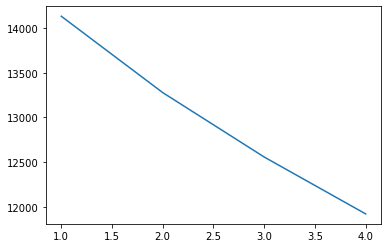

In [26]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [28]:
# Choosing K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(filtered_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 13278.0


In [29]:
# Combining the predicted clusters with the original DF.
filtered_data = filtered_data_copy.reset_index()

In [30]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([filtered_data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,user_id,product_id,cluster_predicted
0,2335,24852,1
1,2335,9076,0
2,2335,26604,0
3,2335,24852,1
4,2335,24838,0


In [31]:
# Cluster Identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 1 to 7714
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            6770 non-null   int64 
 1   product_id         6770 non-null   int64 
 2   cluster_predicted  6770 non-null   uint16
dtypes: int64(2), uint16(1)
memory usage: 171.9 KB


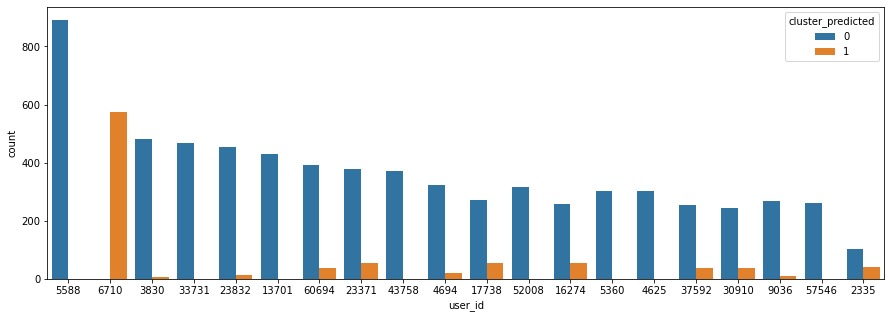

In [32]:
import seaborn as sns

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['user_id'],order=combinedDf['user_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

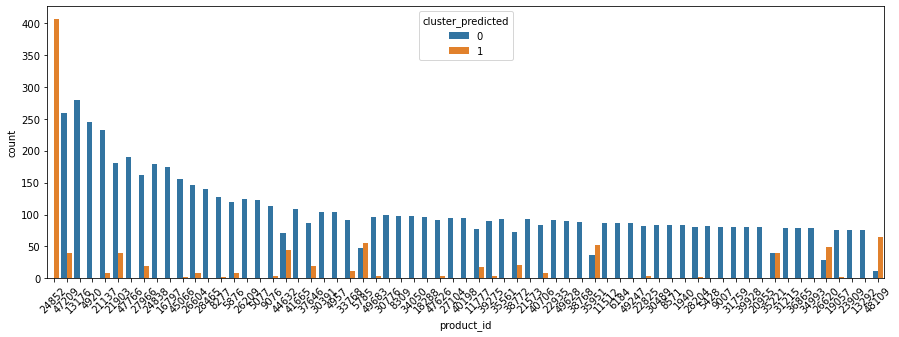

In [34]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['product_id'],order=combinedDf['product_id'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.xticks(rotation = 45)
plt.show()